In [52]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
a = np.loadtxt('BHMdot-time.txt')

In [3]:
print a

[[  0.00000000e+00   3.75003000e-06]
 [  6.22808219e-05   3.75003000e-06]
 [  1.24561507e-04   3.75003000e-06]
 ..., 
 [  4.08157534e+00   3.31341000e-06]
 [  4.08160274e+00   3.31341000e-06]
 [  4.08163014e+00   3.23579000e-06]]


In [4]:
a.shape

(102654, 2)

In [31]:
tmax = 0
amax = 0
aavg = 0
n = 0
for x in a:
    if x[1]>amax:
        amax=x[1];
        tmax=x[0];
    if n!=0:
        aavg = aavg+(x[1]-aavg)/n
    else:
        aavg = x[1]
    n+=1

In [32]:
tmax

3.8469589041095889

In [33]:
amax

5.06269e-06

In [34]:
aavg

2.8779686809601674e-06

In [36]:
max(a[:,1])

5.06269e-06

In [37]:
sum(a[:,1])/len(a)

2.8779771761121125e-06

In [63]:
bavg = np.average(a[:,1])
bmax = np.max(a[:,1])
btmax = np.max(a[:,0])


print bavg
print bmax
print bmax-bavg

2.87797717611e-06
5.06269e-06
2.18471282389e-06


In [51]:
print a[:,1]

[  3.75003000e-06   3.75003000e-06   3.75003000e-06 ...,   3.31341000e-06
   3.31341000e-06   3.23579000e-06]


In [110]:
np.amax(a, axis=0)

array([  4.08163014e+00,   5.06269000e-06])

In [111]:
k= a.argmax(axis=0) # shows max value in ([0th column], [1st column])

In [112]:
print k

[102653  96390]


In [113]:
print k[1]

96390


In [93]:
a[102653]

array([  4.08163014e+00,   3.23579000e-06])

In [94]:
a[96390]

array([  3.84695890e+00,   5.06269000e-06])

In [104]:
np.median(a[:,1])

3.0406499999999998e-06

In [105]:
np.mean(a[:,1])

2.8779771761119875e-06

In [106]:
b = np.loadtxt('SFR-time.txt')

In [107]:
b.shape

(102654, 2)

In [108]:
b[96390]

array([  3.84695890e+00,   3.70321400e-04])

In [114]:
def lastFirst(firstName, lastName):
    separator = ', '
    result = lastName + separator + firstName
    return result

print(lastFirst('Benjamin', 'Franklin'))
print(lastFirst('Andrew', 'Harrington'))

Franklin, Benjamin
Harrington, Andrew


In [116]:
lastFirst('Jonathan', 'Mercedes')

'Mercedes, Jonathan'

In [151]:
from decimal import Decimal

'%e' %Decimal(b[k[1],1])

'3.703214e-04'

In [329]:
a = np.loadtxt('BHMdot-time.txt', usecols = [0,1])
b = np.loadtxt('SFR-time.txt', usecols = [0,1])
c = np.loadtxt('BHMdotEddington-time.txt', usecols = [0,1])

def t_maxall(a,b,c):
    if c == 'none':
        k = a.argmax(axis=0)
        acmax = a[k[1],1]
        num = b[k[1],1]
        
        #acmaxx = a[k[1],1]
        acmed = np.median(a[:,1])

        ratio = (acmax / acmed) * 100
        
        sfrmax = num
        sfrmed = np.median(b[:,1])
        
        ratio1 = (sfrmax / sfrmed) * 100
        
        print "Row with max accretion is row " + str(k[1])
        print "Time at max accretion is: " + str(a[(k[1]),0]) + ' Gyr'
        print "Max accretion rate is: " + '%e' %acmax + ' solar masses per year'
        print "Median of Accretion Rate in BHMdot-time.txt is " + str(np.median(a[:,1])) + ' solar masses per year'
        print "The maximum accretion rate is " + str(ratio) + " percent higher than the median." 
        print "SFR at t_max is: " + "%e" %num + " solar masses per year" #str(b[k[1],1])# 
        print "Median of SFR in SFR-time.txt is " + str(sfrmed) + ' solar masses per year'
        print "The SFR at the max accretion rate time is " + str(ratio1) + ' percent higher than the median.'
        
    elif a== 'none':
        j = b.argmax(axis=0)
        sfrmax = b[j[1],1]
        num = c[j[1],1]
        
        sfrmed = np.median(b[:,1])
        
        ratio = (sfrmax / sfrmed) * 100
        
        ratiomax = num
        ratiomed = np.median(c[:,1])
        
        Eddratio = (ratiomax / ratiomed) * 100
        
        print "Row with max SFR rate is row " + str(j[1])
        print "Time at max SFR rate is: " + str(b[(j[1]),0]) + ' Gyr'
        print "Max SFR rate is: " + '%e' %sfrmax + ' solar masses per year'
        print "Median of SFR rate in BHMdot-time.txt is " + str(sfrmed) + ' solar masses per year'
        print "The maximum SFR rate is " + str(ratio) + " percent higher than the median." 
        print "Accretion rate with Eddington factor at t_max is: " + "%e" %num  #str(b[k[1],1])# 
        print "Median of Accretion rate with Eddington factor in BHMdotEddington-time.txt is " + str(ratiomed) 
        print "The Accretion rate with Eddington factor at the max SFR rate time is " + str(Eddratio) + ' percent higher than the median.'
    else:
        print "Not same shape."

In [330]:
t_maxall('none',b,c)

Row with max SFR rate is row 1143
Time at max SFR rate is: 0.0712492054795 Gyr
Max SFR rate is: 4.849211e-04 solar masses per year
Median of SFR rate in BHMdot-time.txt is 0.0002600658 solar masses per year
The maximum SFR rate is 186.460926427 percent higher than the median.
Accretion rate with Eddington factor at t_max is: 1.509160e-03
Median of Accretion rate with Eddington factor in BHMdotEddington-time.txt is 0.00177678
The Accretion rate with Eddington factor at the max SFR rate time is 84.9379214084 percent higher than the median.


/Users/Jonathan/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


In [158]:
print b[k[1]]

[  3.84695890e+00   3.70321400e-04]


In [214]:
print a[k[1]]

[  3.84695890e+00   5.06269000e-06]


In [225]:
l = a[:,1]
print l
t_maxall(a,b)

[  3.75003000e-06   3.75003000e-06   3.75003000e-06 ...,   3.31341000e-06
   3.31341000e-06   3.23579000e-06]
Row with max accretion is row 96390
Time at max accretion is: 3.84695890411 Gyr
Max accretion rate is: 5.062690e-06 solar masses per year
Median of Accretion Rate in BHMdot-time.txt is 3.04065e-06 solar masses per year
The maximum accretion rate is 166.50025488 percent higher than the median.
SFR at t_max is: 2.819920e-03 solar masses per year
Median of SFR in SFR-time.txt is 0.00177678 solar masses per year
The SFR at the Max accretion rate time is 158.709575749 percent higher than the median.


In [207]:
acmaxx = a[k[1],1]
acmed = np.median(a[:,1])

ratio = (acmaxx / acmed) * 100

print "The maximum accretion rate is " + str(ratio) + " percent higher than the median." 
#print acmaxx
#print acmed

The maximum accretion rate is 166.50025488 percent higher than the median.


In [473]:
d = np.loadtxt('blackholes-merger.txt', usecols= [0,2,4,6])
sfr = np.loadtxt('sfr-merger.txt', usecols = [2])

time = (d[:,0])/ 0.73
mass = d[:,1]
mdot = d[:,2]
mdoter = d[:,3]


In [474]:
def PlotAll(time,yaxis):
    if yaxis is mdot:
        logPlot=plt.gca()
        logPlot.semilogy(time,mdot,'b-', lw = 2) 
        logPlot.set_xlabel('Time (in $10{^9}$ yr)', fontsize = 12) # x and y axis labels
        logPlot.set_ylabel('BH Mass Accretion (in $M_{\odot}$ $yr^{-1}$)')
        #logPlot.set_xlim(0.0,4.5) # the range of x and y values
        #logPlot.set_ylim(1e-08,1.0000000000000001e-05)
        #plt.savefig('BHMdot-time')
        plt.show(logPlot)
    elif yaxis is mass:
        logPlot=plt.gca()
        logPlot.semilogy(time,mass,'m-', lw = 2) 
        logPlot.set_xlabel('Time (in $10{^9}$ yr)', fontsize = 12) # x and y axis labels
        logPlot.set_ylabel('Mass (in $M_{\odot}$)')
        #plt.savefig('SFR-time')
        plt.show(logPlot)
    elif yaxis is sfr:
        logPlot=plt.gca()
        logPlot.semilogy(time,sfr,'y-', lw = 2)
        logPlot.set_xlabel('Time (in $10{^9}$ yr)', fontsize = 12)
        logPlot.set_ylabel('SFR (in $M_{\odot}$)')
        plt.show(logPlot)
        
    else:
        logPlot=plt.gca()
        logPlot.semilogy(time,mdoter,'r-', lw = 2) 
        logPlot.set_xlabel('Time (in $10{^9}$ yr)', fontsize = 12) # x and y axis labels
        logPlot.set_ylabel('BH Mass Accretion compared to Eddington Accretion')
        #plt.savefig('BHMdotEddington-time')
        plt.show(logPlot)
def CombinePlot(plot):
    logPlot=plt.gca()
    if plot is 'masssfr':
        logPlot.semilogy(time,mass,'m-', lw = 2)
        logPlot.semilogy(time,sfr,'y-', lw = 2)
        logPlot.set_ylabel('Mass and SFR (in $M_{\odot}$)')
        logPlot.set_xlabel('Time (in $10{^9}$ yr)', fontsize = 12)
        plt.show(logPlot)
    else:
        logPlot.semilogy(time,mdot,'b-', lw = 2)
        logPlot.semilogy(time,mdoter,'r-', lw = 2) 
        logPlot.set_ylabel('Mass Accretion Rate')
        logPlot.set_xlabel('Time (in $10{^9}$ yr)', fontsize = 12)
        plt.show(logPlot)

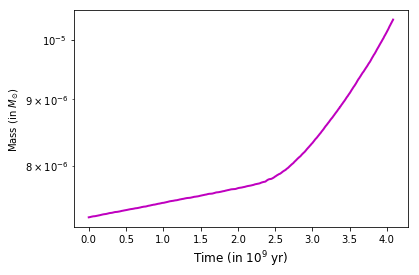

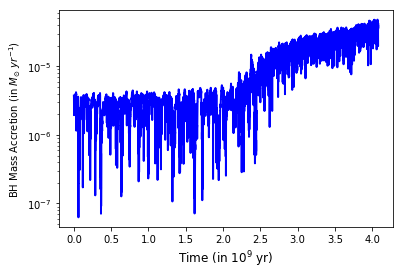

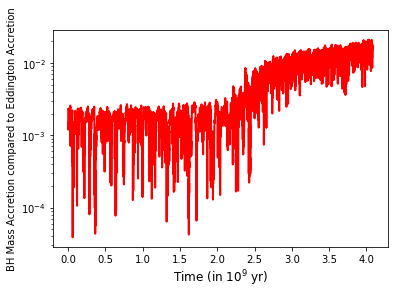

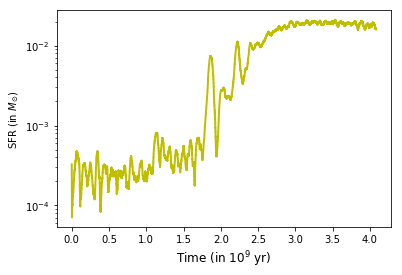

In [475]:
mPlot = PlotAll(time,mass)
mdotPlot = PlotAll(time,mdot)
eddmdotPlot = PlotAll(time,mdoter)
sfrPlot = PlotAll(time,sfr)

In [737]:
def merge_t_maxall(x,y):
    if x is mdot and y is sfr:
        maxmdotrow = mdot.argmax(axis=0)
        sfr_at_t_max = sfr[maxmdotrow]
        
        t_max = time[maxmdotrow]
        acmed = np.median(mdot)
        
        ratio = (max(mdot) / acmed) * 100
        
        sfrmed = np.median(sfr)
        
        ratio1 = (sfr_at_t_max / sfrmed) * 100
        
        print "Row with max accretion is row " + str(maxmdotrow)
        print "Time at max accretion is: " + str(t_max) + ' Gyr'
        print "Max accretion rate is: " + '%e' %max(mdot) + ' solar masses per year'
        print "Median of Accretion Rate is " + '%e' %acmed + ' solar masses per year'
        print "The maximum accretion rate is " + str(ratio) + " percent higher than the median." 
        print "SFR at max accretion is: " + "%e" %sfr_at_t_max + " solar masses per year"
        print "Median of SFR is " + '%e' %sfrmed + ' solar masses per year'
        print "The SFR at the max accretion rate time is " + str(ratio1) + ' percent higher than the median.'
        return t_max
        return maxx
    elif x is sfr and y is mdot:
        maxsfrrow = sfr.argmax(axis=0)
        mdot_at_t_max = mdot[maxsfrrow]
        
        t_max = time[maxsfrrow]
        acmed = np.median(mdot)

        ratio = (mdot_at_t_max / acmed) * 100
        
        sfrmed = np.median(sfr)
        
        ratio1 = (max(sfr) / sfrmed) * 100
        
        print "Row with max SFR is row " + str(maxsfrrow)
        print "Time at max SFR is: " + str(t_max) + ' Gyr'
        print "Max SFR rate is: " + '%e' %max(sfr) + ' solar masses per year'
        print "Median of SFR Rate is " + '%e' %sfrmed + ' solar masses per year'
        print "The maximum SFR rate is " + str(ratio1) + " percent higher than the median." 
        print "Accretion at max SFR is: " + "%e" %mdot_at_t_max + " solar masses per year"
        print "Median of accretion rate is " + '%e' %acmed + ' solar masses per year'
        print "The accretion rate at the max SFR rate time is " + str(ratio) + ' percent higher than the median.'
    else:
        print "Not same shape."

In [739]:
merge_t_maxall(mdot,sfr)
max(mdot)

Row with max accretion is row 176853
Time at max accretion is: 4.07167123288 Gyr
Max accretion rate is: 4.789580e-05 solar masses per year
Median of Accretion Rate is 1.266950e-05 solar masses per year
The maximum accretion rate is 378.040175224 percent higher than the median.
SFR at max accretion is: 1.651366e-02 solar masses per year
Median of SFR is 1.543760e-02 solar masses per year
The SFR at the max accretion rate time is 106.970383998 percent higher than the median.


4.7895800000000003e-05

In [736]:
merge_t_maxall(sfr,mdot)

Row with max SFR is row 141055
Time at max SFR is: 3.53312328767 Gyr
Max SFR rate is: 2.113065e-02 solar masses per year
Median of SFR Rate is 1.543760e-02 solar masses per year
The maximum SFR rate is 136.877817796 percent higher than the median.
Accretion at max SFR is: 1.888870e-05 solar masses per year
Median of accretion rate is 1.266950e-05 solar masses per year
The accretion rate at the max SFR rate time is 149.087967165 percent higher than the median.


In [544]:
def AllPlot(arg):
    if arg is 'merger' :
        d = np.loadtxt('blackholes-merger.txt', usecols= [0,2,4,6])
        sfr = np.loadtxt('sfr-merger.txt', usecols = [2])

        time = (d[:,0])/ 0.73
        mass = d[:,1]
        mdot = d[:,2]
        mdoter = d[:,3]
        #if yaxis is mdot:
        logPlot1=plt.gca()
        logPlot1.semilogy(time,mdot,'b-', lw = 2) 
        logPlot1.set_xlabel('Time (in $10{^9}$ yr)', fontsize = 12) # x and y axis labels
        logPlot1.set_ylabel('BH Mass Accretion (in $M_{\odot}$ $yr^{-1}$)')
        #logPlot.set_xlim(0.0,4.5) # the range of x and y values
        #logPlot.set_ylim(1e-08,1.0000000000000001e-05)
        #plt.savefig('BHMdot-time')
        plt.show(logPlot1)
        #elif yaxis is mass:
        logPlot2=plt.gca()
        logPlot2.semilogy(time,mass,'m-', lw = 2) 
        logPlot2.set_xlabel('Time (in $10{^9}$ yr)', fontsize = 12) # x and y axis labels
        logPlot2.set_ylabel('Mass (in $M_{\odot}$)')
        #plt.savefig('SFR-time')
        plt.show(logPlot2)
        #elif yaxis is sfr:
        logPlot3=plt.gca()
        logPlot3.semilogy(time,sfr,'y-', lw = 2)
        logPlot3.set_xlabel('Time (in $10{^9}$ yr)', fontsize = 12)
        logPlot3.set_ylabel('SFR (in $M_{\odot}$)')
        plt.show(logPlot3)

        #else:
        logPlot4=plt.gca()
        logPlot4.semilogy(time,mdoter,'r-', lw = 2) 
        logPlot4.set_xlabel('Time (in $10{^9}$ yr)', fontsize = 12) # x and y axis labels
        logPlot4.set_ylabel('BH Mass Accretion compared to Eddington Accretion')
        #plt.savefig('BHMdotEddington-time')
        plt.show(logPlot4)
        
        return time
        return mass
        return mdot
        return mdoter
    else:
        d = np.loadtxt('blackholes-nomerger.txt', usecols= [0,2,4,6])
        sfr = np.loadtxt('sfr-nomerger.txt', usecols = [2])
        time = (d[:,0])/ 0.73
        mass = d[:,1]
        mdot = d[:,2]
        mdoter = d[:,3]
        #if yaxis is mdot:
        logPlot=plt.gca()
        logPlot.semilogy(time,mdot,'b-', lw = 2) 
        logPlot.set_xlabel('Time (in $10{^9}$ yr)', fontsize = 12) # x and y axis labels
        logPlot.set_ylabel('BH Mass Accretion (in $M_{\odot}$ $yr^{-1}$)')
        #logPlot.set_xlim(0.0,4.5) # the range of x and y values
        #logPlot.set_ylim(1e-08,1.0000000000000001e-05)
        #plt.savefig('BHMdot-time')
        plt.show(logPlot)
        #elif yaxis is mass:
        logPlot=plt.gca()
        logPlot.semilogy(time,mass,'m-', lw = 2) 
        logPlot.set_xlabel('Time (in $10{^9}$ yr)', fontsize = 12) # x and y axis labels
        logPlot.set_ylabel('Mass (in $M_{\odot}$)')
        #plt.savefig('SFR-time')
        plt.show(logPlot)
        #elif yaxis is sfr:
        logPlot=plt.gca()
        logPlot.semilogy(time,sfr,'y-', lw = 2)
        logPlot.set_xlabel('Time (in $10{^9}$ yr)', fontsize = 12)
        logPlot.set_ylabel('SFR (in $M_{\odot}$)')
        plt.show(logPlot)

        #else:
        logPlot=plt.gca()
        logPlot.semilogy(time,mdoter,'r-', lw = 2) 
        logPlot.set_xlabel('Time (in $10{^9}$ yr)', fontsize = 12) # x and y axis labels
        logPlot.set_ylabel('BH Mass Accretion compared to Eddington Accretion')
        #plt.savefig('BHMdotEddington-time')
        plt.show(logPlot)


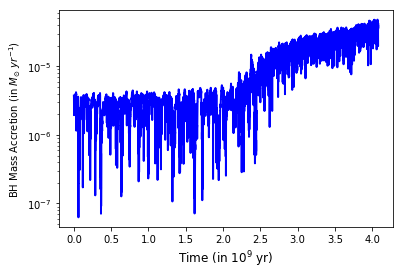

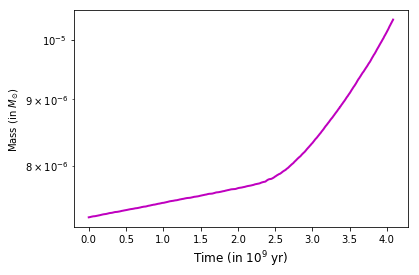

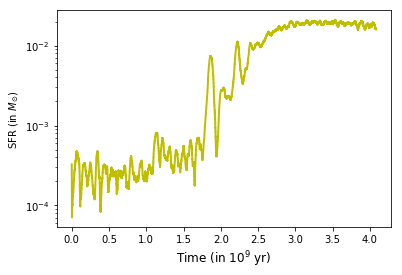

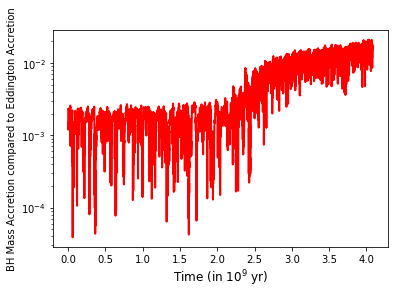

array([  0.00000000e+00,   6.22808219e-05,   1.24561507e-04, ...,
         4.08160274e+00,   4.08161644e+00,   4.08163014e+00])

In [545]:
AllPlot('merger')

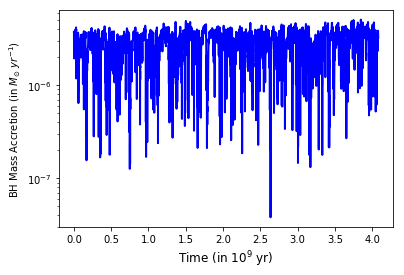

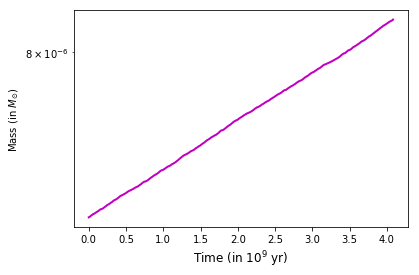

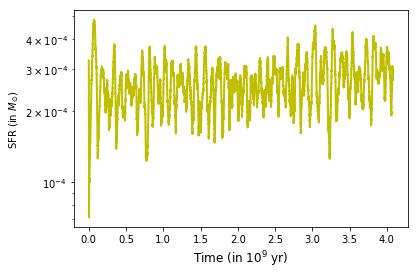

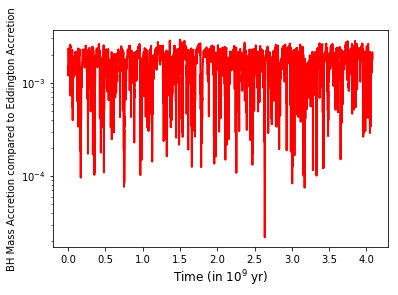

In [546]:
AllPlot('no merger')

In [547]:
import matplotlib.gridspec as gridspec

gs = gridspec.GridSpec(2, 2)
gs[0,0] = logPlot1
gs[0,1] = logPlot2
gs[1,0] = logPlot3
gs[1,1] = logPlot4

ax1 = plt.subplot(gs[0,0]) #upper left
ax2 = plt.subplot(gs[0,1]) #upper right
ax3 = plt.subplot(gs[1,0]) #lower left
ax4 = plt.subplot(gs[1,1]) #lower right

TypeError: 'GridSpec' object does not support item assignment

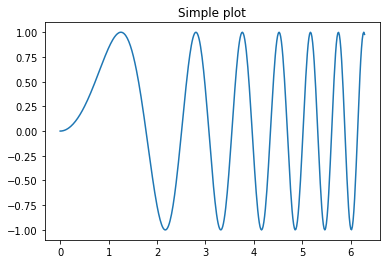

In [549]:
x = np.linspace(0, 2*np.pi, 400)
y = np.sin(x**2)
fig, ax = plt.subplots()
ax.plot(x, y)
ax.set_title('Simple plot')

In [ ]:
f, axarr = plt.subplots(4, sharex=True)
axarr[0].semilogy(time, mass,'m-')
#axarr[0].set_title('Sharing X axis')
axarr[1].semilogy(time, mdot,'b-')
axarr[2].semilogy(time,mdoter,'r-')
axarr[3].semilogy(time,sfr,'y-')
axarr[3].set_xlabel('time')

f.set_figwidth(3)
f.set_figheight(8)
f.set_frameon(True)
f.set_snap(True)

Figure(1008x1008)


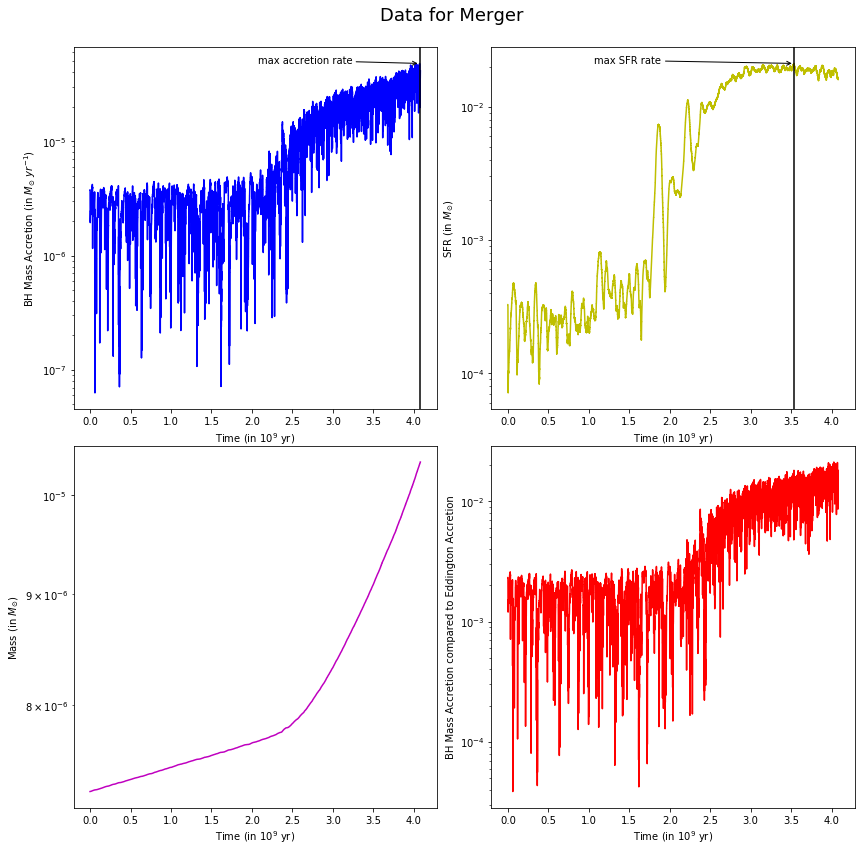

In [765]:
fig = plt.figure(figsize=(14,14))
gs = gridspec.GridSpec(2, 2)

ax1 = fig.add_subplot(gs[0,0])
ax1.semilogy(time, mdot, 'b-')
ax1.axvline(4.071671232876712, color = 'k')
ax1.annotate('max accretion rate', xy=(4.071671232876712, max(mdot) ), xytext=(2.07, max(mdot)),arrowprops=dict(arrowstyle="->", facecolor='black'))
ax1.set_ylabel('BH Mass Accretion (in $M_{\odot}$ $yr^{-1}$)')
ax2 = fig.add_subplot(gs[0,1])
ax2.semilogy(time, sfr, 'y-')
ax2.axvline(3.53312328767, color = 'k')
ax2.annotate('max SFR rate', xy=(3.53312328767, max(sfr) ), xytext=(1.07, max(sfr)),arrowprops=dict(arrowstyle="->", facecolor='black'))
ax2.set_ylabel('SFR (in $M_{\odot}$)')
ax3 = fig.add_subplot(gs[1,0])
ax3.semilogy(time, mass, 'm-')
ax3.set_ylabel('Mass (in $M_{\odot}$)')
ax4 = fig.add_subplot(gs[1,1])
ax4.semilogy(time, mdoter, 'r-')
ax4.set_ylabel('BH Mass Accretion compared to Eddington Accretion')
ax1.set_xlabel('Time (in $10{^9}$ yr)')#, fontsize = 12)
ax2.set_xlabel('Time (in $10{^9}$ yr)')
ax3.set_xlabel('Time (in $10{^9}$ yr)')
ax4.set_xlabel('Time (in $10{^9}$ yr)')
#ax5 = fig.add_subplot(gs[0,2])
#ax5.plot([1,2,3,4], [1,0,0,1], 'c-')
gs.update(wspace=0.15, hspace=0.1)
plt.suptitle('Data for Merger', y= 0.92, fontsize = 18)
plt.savefig('Merger Data'+'.pdf')
print fig

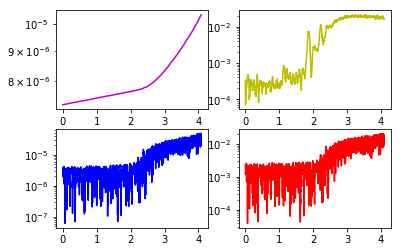

In [678]:
ax1 = plt.subplot(221)
plt.semilogy(time, mass,'m-')
#plt.setp(ax1.get_xticklabels(), fontsize=6)

# share x only
ax2 = plt.subplot(222, sharex=ax1)
plt.semilogy(time, sfr,'y-')
# make these tick labels invisible
#plt.setp(ax2.get_xticklabels(), visible=False)

# share x
ax3 = plt.subplot(223, sharex=ax1) #,sharey=ax1)
plt.semilogy(time, mdot,'b-')
#plt.xlim(0.01, 5.0)

ax4 = plt.subplot(224, sharex=ax1)
plt.semilogy(time,mdoter,'r-')
plt.show()